In [1]:
# How To Use Machine Learning To Possibly Become A Millionaire: Predicting The Stock Market?
# https://towardsdatascience.com/how-to-use-machine-learning-to-possibly-become-a-millionaire-predicting-the-stock-market-33861916e9c5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stocker
from stocker import Stocker
%matplotlib inline

GOOGL Stocker Initialized. Data covers 2004-08-19 00:00:00 to 2018-03-27 00:00:00.
Maximum Adj. Close = 1187.56 on 2018-01-26 00:00:00.
Minimum Adj. Close = 50.16 on 2004-09-03 00:00:00.
Current Adj. Close = 1006.94 on 2018-03-27 00:00:00.



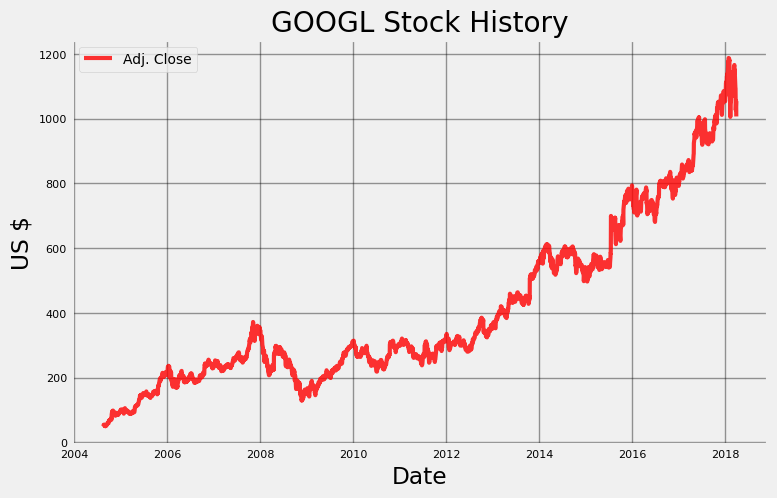

In [3]:
goog = Stocker('GOOGL')
goog.plot_stock()

Predicted Price on 2018-06-25 00:00:00 = $1165.88


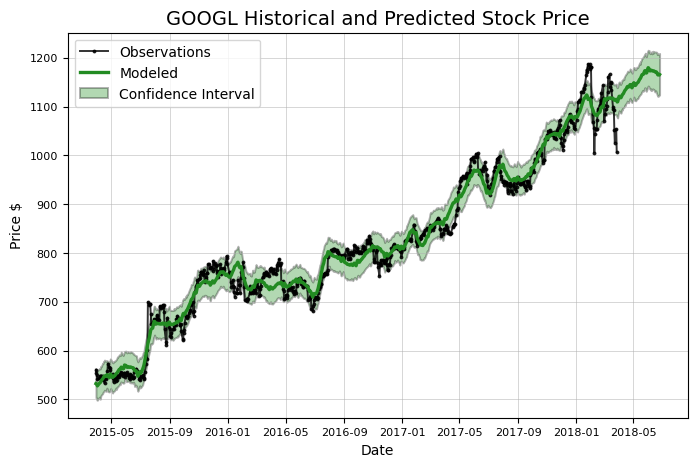

In [4]:
# Making prediction
model, model_data = goog.create_prophet_model(days=90)


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $1039.00.
Actual price on    2018-03-23 00:00:00 = $1026.55.

Average Absolute Error on Training Data = $14.31.
Average Absolute Error on Testing  Data = $65.08.

When the model predicted an increase, the price increased 58.27% of the time.
When the model predicted a  decrease, the price decreased  48.18% of the time.

The actual value was within the 80% confidence interval 64.00% of the time.


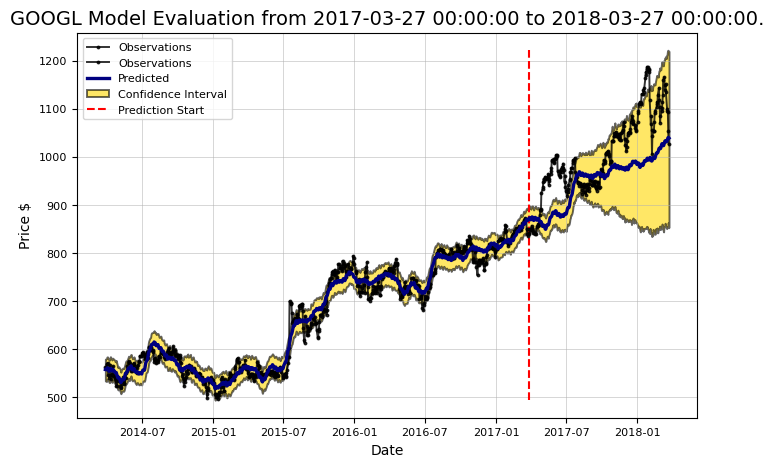

In [5]:
goog.evaluate_prediction()

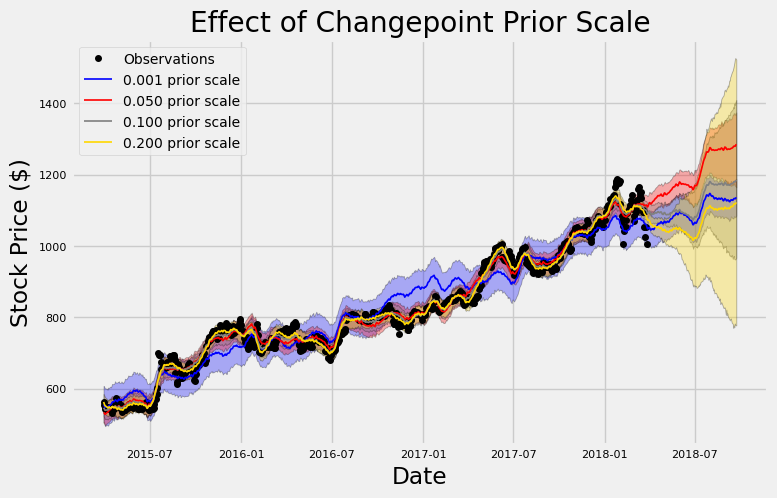

In [6]:
#changepoint priors is the list of changepoints to evaluate
goog.changepoint_prior_analysis(changepoint_priors = [0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

     cps  train_err  train_range    test_err  test_range
0  0.001  39.201098   119.454910   39.457631  119.629083
1  0.050  12.054728    39.825473  204.937025  183.015077
2  0.100  10.751818    36.837103  218.985054  291.388094
3  0.200   9.324159    33.193727  217.488761  536.369393


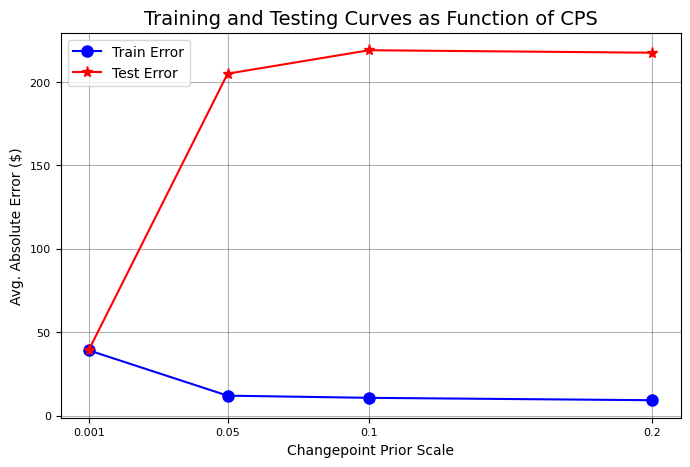

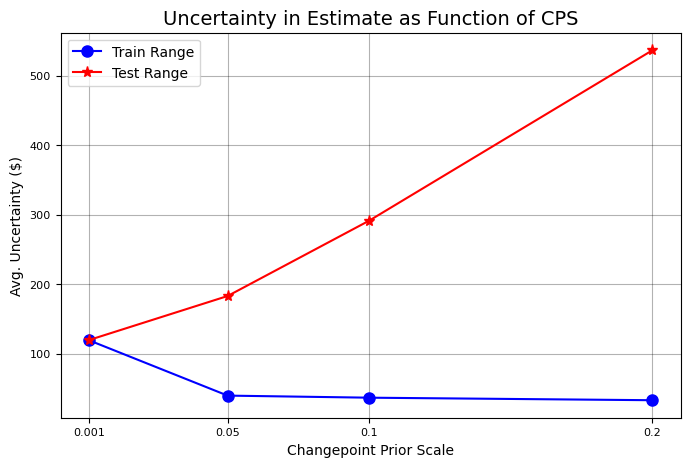

In [7]:
# validate changepoint priors during a certain period of time
goog.changepoint_prior_validation(start_date = '2016-01-04', end_date = '2017-01-03', changepoint_priors = [0.001, 0.05, 0.1, 0.2])


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $1032.98.
Actual price on    2018-03-23 00:00:00 = $1026.55.

Average Absolute Error on Training Data = $11.06.
Average Absolute Error on Testing  Data = $69.55.

When the model predicted an increase, the price increased 58.45% of the time.
When the model predicted a  decrease, the price decreased  48.60% of the time.

The actual value was within the 80% confidence interval 79.60% of the time.


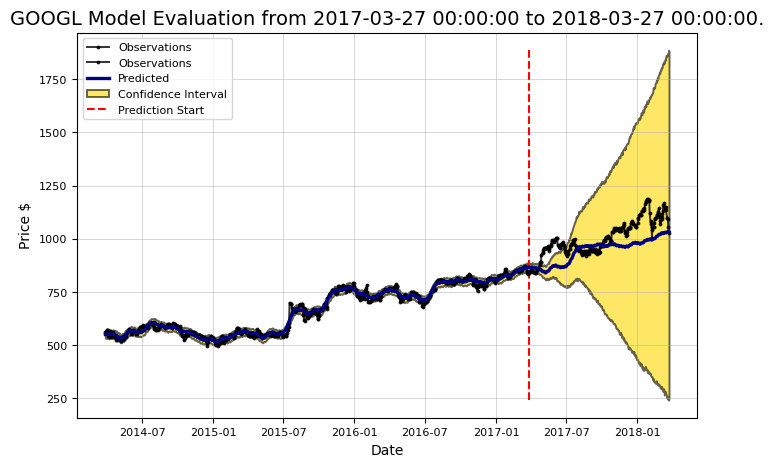

In [8]:
goog.evaluate_prediction()

/Users/koki/awesome/stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in GOOGL from 2017-03-27 00:00:00 to 2018-03-27 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 58.45% of the time.
When the model predicted a  decrease, the price decreased  48.60% of the time.

The total profit using the Prophet model = $108630.00.
The Buy and Hold strategy profit =         $188040.00.

Thanks for playing the stock market!



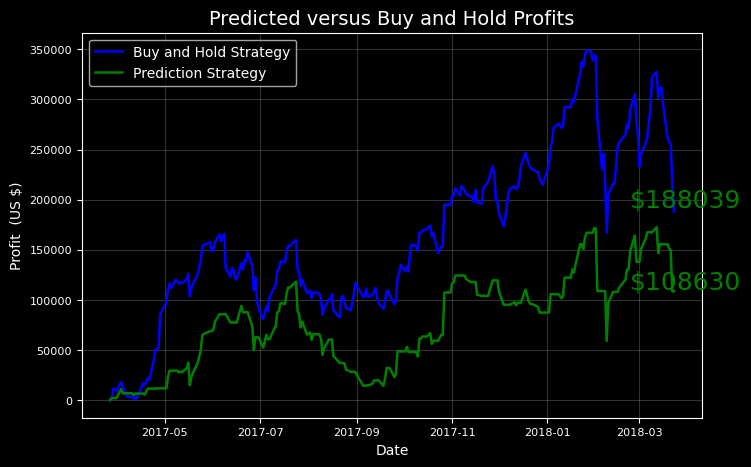

In [9]:
goog.evaluate_prediction(nshares = 1000)

In [10]:
# getting dataframe between 2004-08-19 and 2018-03-27
goog_data = goog.make_df("2004-08-19", '2018-03-27')
goog_data.head(50)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2004-08-19,100.010,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,2004-08-19,50.322842,0.163003
1,2004-08-20,101.010,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,2004-08-20,54.322689,3.661302
2,2004-08-23,110.760,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,2004-08-23,54.869377,-0.682106
3,2004-08-24,111.240,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,2004-08-24,52.597363,-3.194862
4,2004-08-25,104.760,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,2004-08-25,53.164113,0.621920
5,2004-08-26,104.950,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0,2004-08-26,54.122070,1.484583
6,2004-08-27,108.100,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0,2004-08-27,53.239345,-0.978019
7,2004-08-30,105.280,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0,2004-08-30,51.162935,-1.640063
8,2004-08-31,102.320,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0,2004-08-31,51.343492,0.025077
9,2004-09-01,102.700,102.97,99.67,100.250,9138200.0,0.0,1.0,51.509003,51.644421,49.989312,50.280210,9138200.0,2004-09-01,50.280210,-1.228793


In [11]:
goog_data = goog_data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj. Close', 'Volume']]

In [12]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [13]:
# make a copy of the dataframe, convert 'Date' column into datetime format, and then add the column as index
df = goog_data
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,100.01,104.06,95.96,100.335,50.322842,44659000.0
2004-08-20,2004-08-20,101.01,109.08,100.50,108.310,54.322689,22834300.0
2004-08-23,2004-08-23,110.76,113.48,109.05,109.400,54.869377,18256100.0
2004-08-24,2004-08-24,111.24,111.60,103.57,104.870,52.597363,15247300.0
2004-08-25,2004-08-25,104.76,108.00,103.88,106.000,53.164113,9188600.0


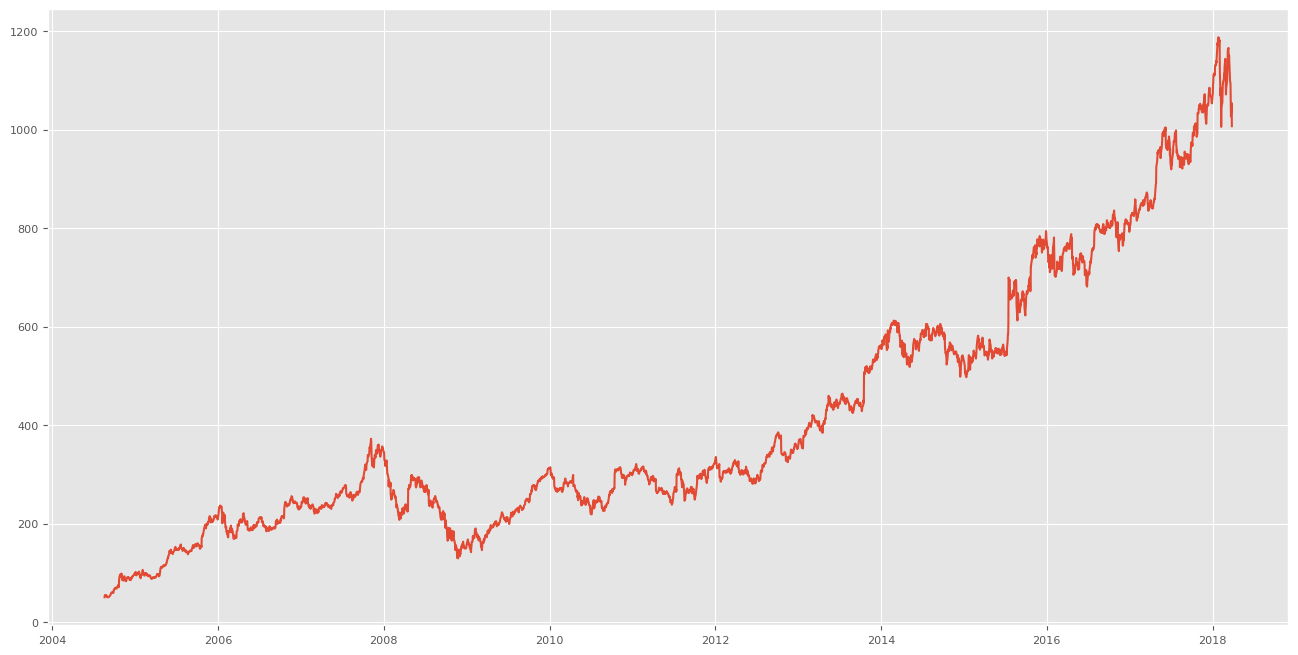

In [14]:
# plot the 'Date' column and 'Adj. Close' column
plt.figure(figsize = (16, 8))
plt.plot(df['Date'], df['Adj. Close'], label = 'Close Price History')

In [15]:
# creating dataframe with date and the target variable
data = df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Adj. Close'])
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj. Close'][i] = data['Adj. Close'][i]
new_data.head()

,Date,Adj. Close
0,2004-08-19 00:00:00,50.3228
1,2004-08-20 00:00:00,54.3227
2,2004-08-23 00:00:00,54.8694
3,2004-08-24 00:00:00,52.5974
4,2004-08-25 00:00:00,53.1641


In [16]:
# train test split
train = new_data[:2600]
test = new_data[2600:]

In [17]:
new_data.shape, train.shape, test.shape

((3424, 2), (2600, 2), (824, 2))

In [18]:
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

(Timestamp('2004-08-19 00:00:00'),
 Timestamp('2014-12-15 00:00:00'),
 Timestamp('2014-12-16 00:00:00'),
 Timestamp('2018-03-27 00:00:00'))

In [19]:
# making predictions
num = test.shape[0]
preds = []
for i in range(0, num):
    a = train['Adj. Close'][len(train) - 924 + i:].sum() + sum(preds)
    b = a / num
    preds.append(b)

In [20]:
preds.shape()

AttributeError: 'list' object has no attribute 'shape'

In [21]:
len(preds)

824

In [22]:
# measure accuracy of the prediction using root mean squared error method
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
# np.power = 自乗
rms = np.sqrt(np.mean(np.power((np.array(test['Adj. Close']) - preds), 2)))
rms

264.46002931639754

<ipython-input-23-44fff6e65644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


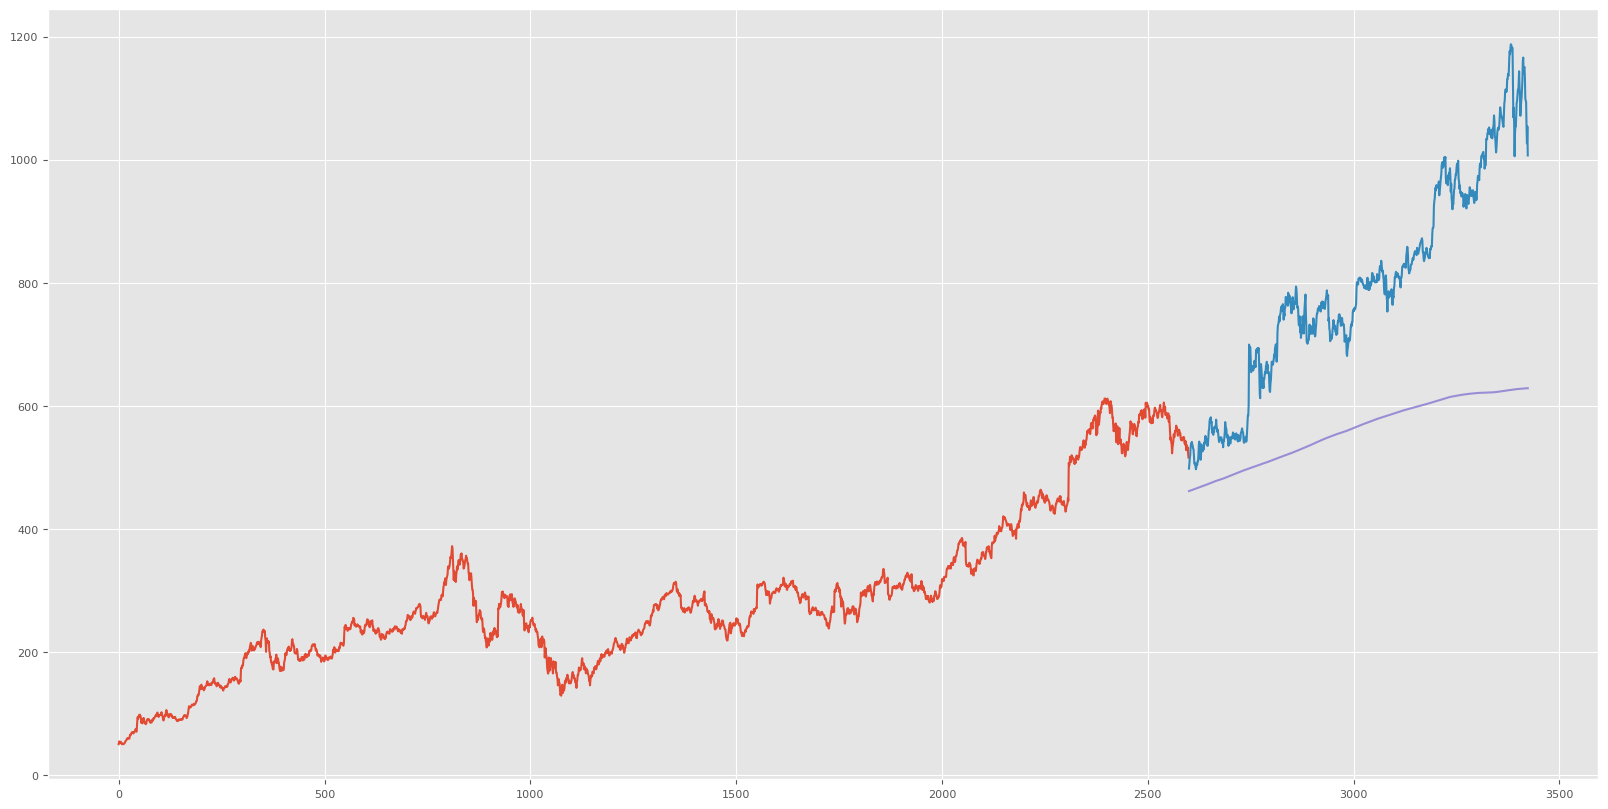

In [23]:
test['Predictions'] = preds
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close', 'Predictions']])

In [24]:
# the black line is the prediction. The blue line is the actual stock price movement. The prediction follows the
# general trend (upward), but it is still way off. I conclude this prediction model is unsatisfactory.

In [25]:
# try linear regression method to make another prediction
lr_data = goog_data
lr_data.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,100.01,104.06,95.96,100.335,50.322842,44659000.0
2004-08-20,2004-08-20,101.01,109.08,100.50,108.310,54.322689,22834300.0
2004-08-23,2004-08-23,110.76,113.48,109.05,109.400,54.869377,18256100.0
2004-08-24,2004-08-24,111.24,111.60,103.57,104.870,52.597363,15247300.0
2004-08-25,2004-08-25,104.76,108.00,103.88,106.000,53.164113,9188600.0


In [26]:
lr_data['Date'] = pd.to_datetime(lr_data['Date'], format = '%Y-%m-%d')
lr_data.index = lr_data['Date']
lr_data = lr_data.sort_index(ascending = True, axis = 0)
lr_data.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,100.01,104.06,95.96,100.335,50.322842,44659000.0
2004-08-20,2004-08-20,101.01,109.08,100.50,108.310,54.322689,22834300.0
2004-08-23,2004-08-23,110.76,113.48,109.05,109.400,54.869377,18256100.0
2004-08-24,2004-08-24,111.24,111.60,103.57,104.870,52.597363,15247300.0
2004-08-25,2004-08-25,104.76,108.00,103.88,106.000,53.164113,9188600.0


In [27]:
goog_data.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,100.01,104.06,95.96,100.335,50.322842,44659000.0
2004-08-20,2004-08-20,101.01,109.08,100.50,108.310,54.322689,22834300.0
2004-08-23,2004-08-23,110.76,113.48,109.05,109.400,54.869377,18256100.0
2004-08-24,2004-08-24,111.24,111.60,103.57,104.870,52.597363,15247300.0
2004-08-25,2004-08-25,104.76,108.00,103.88,106.000,53.164113,9188600.0


In [28]:
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3424 non-null   datetime64[ns]
 1   Open        3424 non-null   float64       
 2   High        3424 non-null   float64       
 3   Low         3424 non-null   float64       
 4   Close       3424 non-null   float64       
 5   Adj. Close  3424 non-null   float64       
 6   Volume      3424 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 214.0 KB


In [29]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3424 non-null   datetime64[ns]
 1   Open        3424 non-null   float64       
 2   High        3424 non-null   float64       
 3   Low         3424 non-null   float64       
 4   Close       3424 non-null   float64       
 5   Adj. Close  3424 non-null   float64       
 6   Volume      3424 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 214.0 KB


In [30]:
# the 'Date' column in goog_data is already in datetime format, so I could've just copy the goog_data into lr_data

In [31]:
# failed to pip install fastai==0.7.0 to use add_datepart, so I copied the code from Github
# https://gist.github.com/adidoit/d32f6117647b0e8564edc6507f9e3625

import re

def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [32]:
new_data.head()

,Date,Adj. Close
0,2004-08-19 00:00:00,50.3228
1,2004-08-20 00:00:00,54.3227
2,2004-08-23 00:00:00,54.8694
3,2004-08-24 00:00:00,52.5974
4,2004-08-25 00:00:00,53.1641


In [33]:
# modify the new_data using add_datepart function
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis = 1, inplace = True)
new_data.head()

,Adj. Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,50.3228,2004,8,34,19,3,232,False,False,False,False,False,False
1,54.3227,2004,8,34,20,4,233,False,False,False,False,False,False
2,54.8694,2004,8,35,23,0,236,False,False,False,False,False,False
3,52.5974,2004,8,35,24,1,237,False,False,False,False,False,False
4,53.1641,2004,8,35,25,2,238,False,False,False,False,False,False


In [34]:
# train-test split

train = new_data[:2600]
test = new_data[2600:]
x_train = train.drop('Adj. Close', axis = 1)
y_train = train['Adj. Close']
x_test = test.drop('Adj. Close', axis = 1)
y_test = test['Adj. Close']

In [35]:
# implementing linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# now making a prediction

preds = model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(preds)), 2)))
rms

292.21562094558715

<ipython-input-37-44fff6e65644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


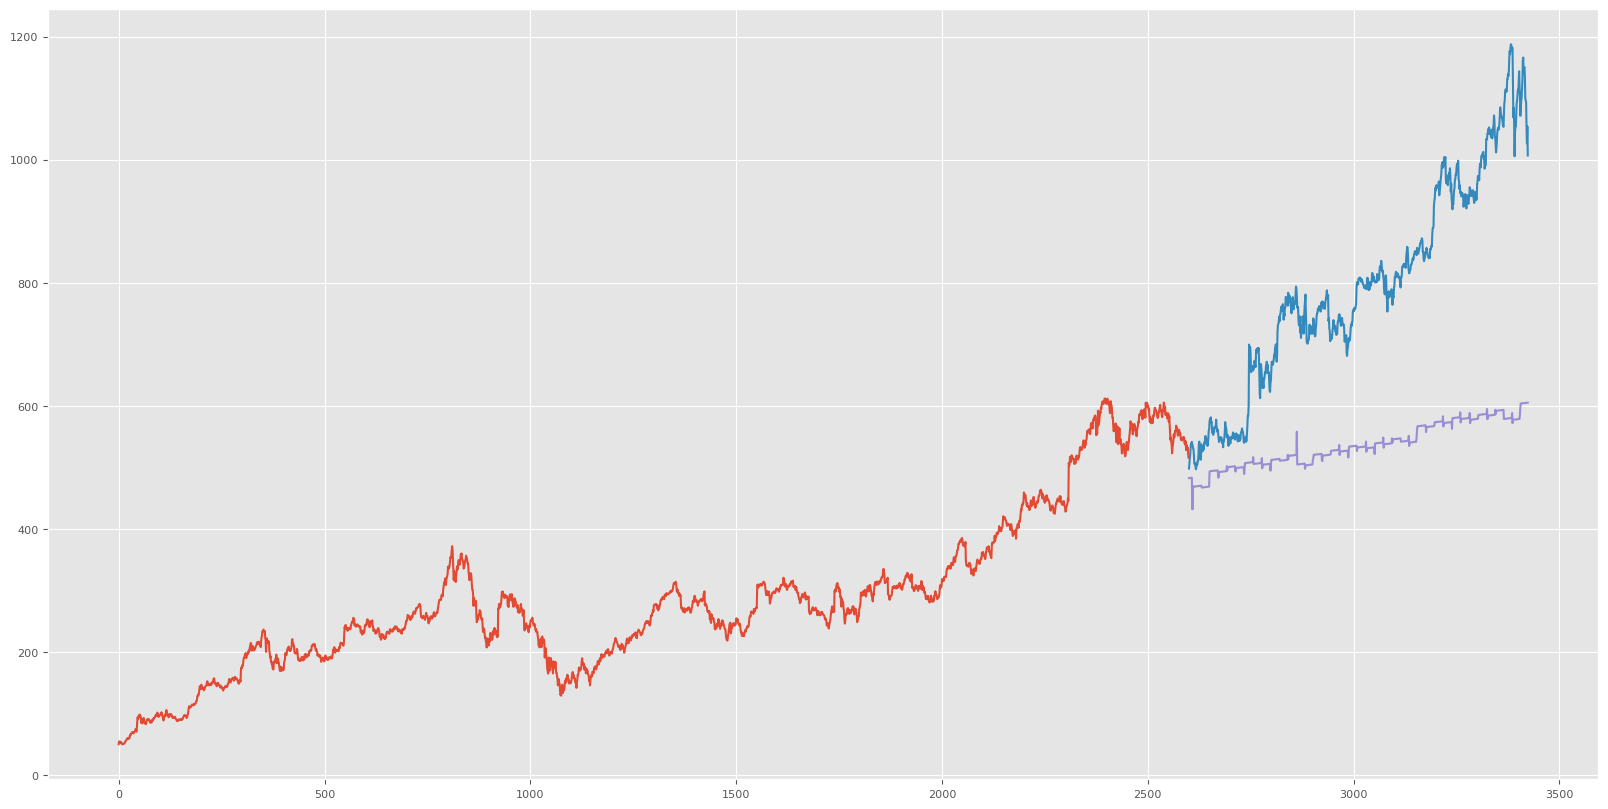

In [37]:
test['Predictions'] = preds
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close', 'Predictions']])

In [38]:
# again, this prediction method correctly predicts the general trend but still far from the actual price movement

In [39]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [41]:
# scaling the data

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [42]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv = 5)

In [43]:
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [44]:
rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(preds)), 2)))
rms

533.8534061954226

<ipython-input-45-44fff6e65644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


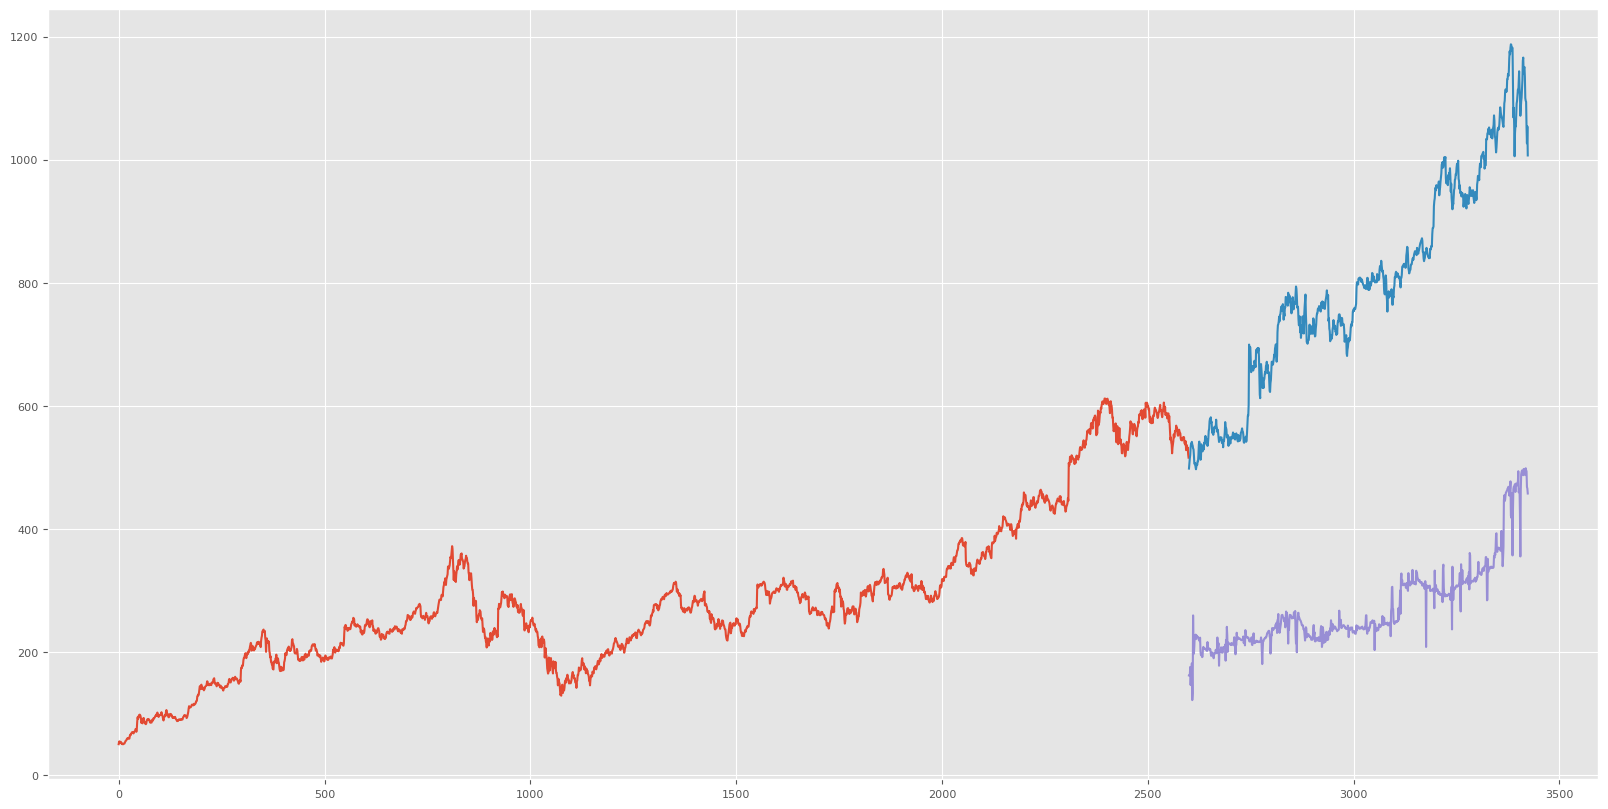

In [45]:
test['Predictions'] = preds
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close', 'Predictions']])

In [46]:
# k-nearest neighbors seems it shouldn't be used to predict the trend of future stock price...?

In [49]:
import tensorflow as tf
from tensorflow.keras import layers

In [80]:
# I don't understand this cell at all. Why adding layers 3 times?
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.relu))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Tensor doesn't support float64 so np.array needs to be float32 data type
X_train = np.array(x_train).astype(np.float32)
Y_train = np.array(y_train).astype(np.float32)

In [81]:
X_train

array([[0.        , 0.6363636 , 0.63461536, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6363636 , 0.63461536, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6363636 , 0.65384614, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.9423077 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.9423077 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.96153843, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [82]:
X_train.shape

(2600, 12)

In [83]:
model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
82/82 [==============================] - 0s 2ms/step - loss: 98575.7500
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 74321.5859
Epoch 3/50
82/82 [==============================] - 0s 1ms/step - loss: 16466.1777
Epoch 4/50
82/82 [==============================] - 0s 1ms/step - loss: 12514.0537
Epoch 5/50
82/82 [==============================] - 0s 1ms/step - loss: 10139.1611
Epoch 6/50
82/82 [==============================] - 0s 1ms/step - loss: 8067.0044
Epoch 7/50
82/82 [==============================] - 0s 1ms/step - loss: 6479.5308
Epoch 8/50
82/82 [==============================] - 0s 1ms/step - loss: 5420.9004
Epoch 9/50
82/82 [==============================] - 0s 2ms/step - loss: 4823.2622
Epoch 10/50
82/82 [==============================] - 0s 1ms/step - loss: 4533.7124
Epoch 11/50
82/82 [==============================] - 0s 1ms/step - loss: 4358.3306
Epoch 12/50
82/82 [==============================] - 0s 1ms/step - loss: 4280.3340
Epoch 13

In [84]:
preds = model.predict(x_test)

In [85]:
x_test.shape

(824, 12)

In [86]:
y_test.shape

(824,)

In [87]:
rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(preds)), 2)))
rms

545.0731273118491

<ipython-input-88-44fff6e65644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


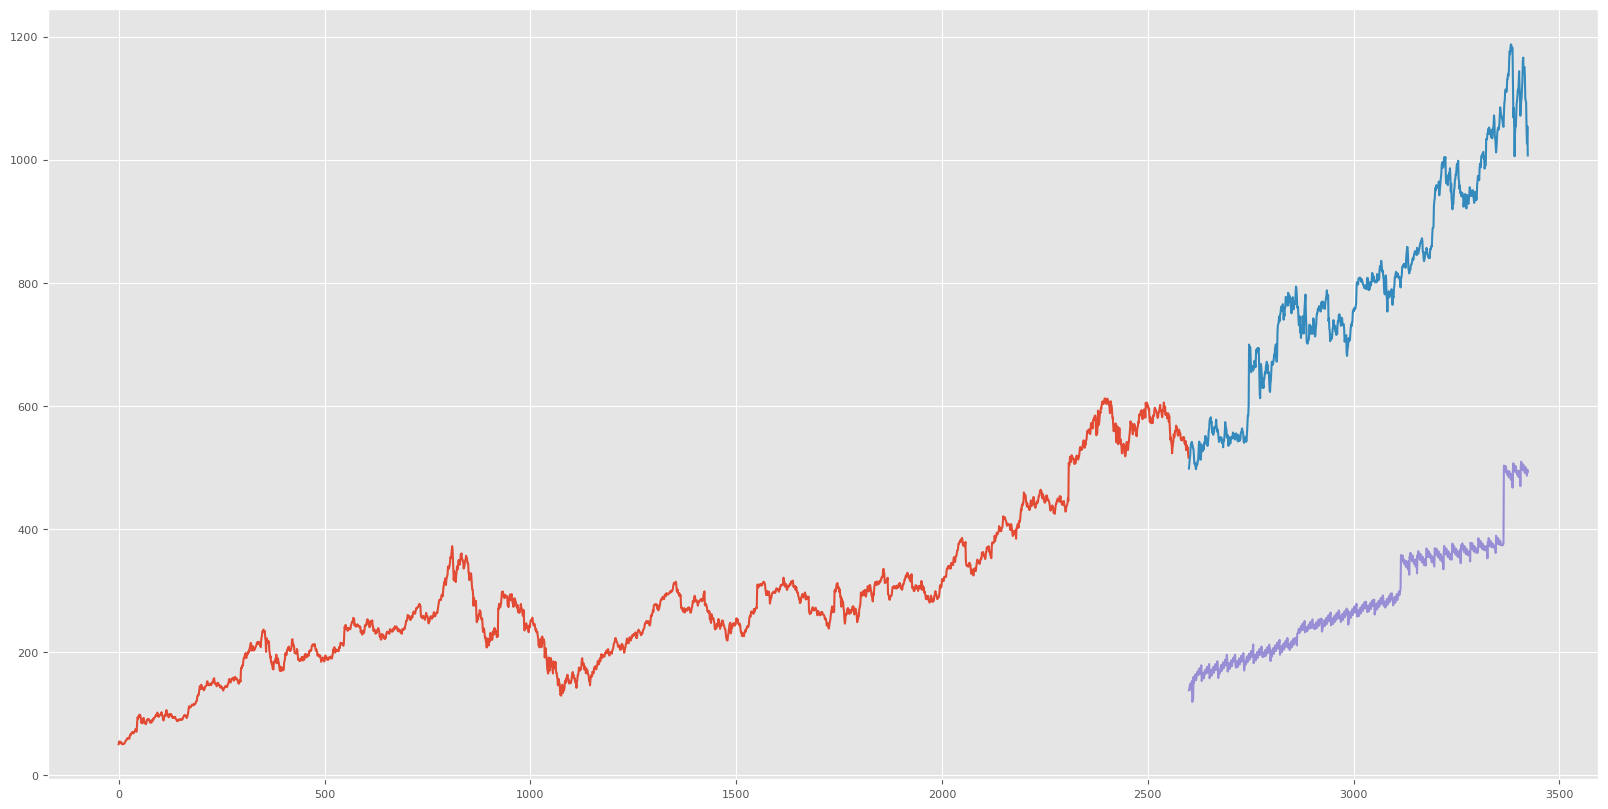

In [88]:
test['Predictions'] = preds
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close', 'Predictions']])

In [89]:
# multilayer perceptron method seems not a good idea as a mean to predict stock price.

# Interesting article because at the end of the story, the conclusion was that it's not even worth trying to
# make a prediction unless you are an investment genius like Warren Buffett. My take was that it seems impossible
# to predict long-term (months to year) stock price movement, but there might be a way to do so in shorter term, 
# like 1-7 days...? Also, I feel it may be possible to predict stock price after certain event, like 10% gain in 
# 2 days or 10% loss in a day, due to the fact that investors' sentiment is the huge contribution to price movement.